In [8]:
# Thêm drive vào colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Tạo thư mục animal-10 để chứa dữ liệu
%mkdir /content/drive/My\ Drive/Data/animal-10

# ***1. DownLoad Data:***

In [10]:
%cd /content/drive/My\ Drive/Data/animal-10

/content/drive/My Drive/Data/animal-10


In [11]:
# Thêm file kaggle.json chứa thông tin tài khoản của trang kaggle để có thể gọi Api cho kaggle
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [12]:
%cd ~

/root


In [0]:
%mkdir .kaggle/

In [24]:
%ls -a

./             .bashrc   .gsutil/   .kaggle/  .node-gyp/
../            .cache/   .ipython/  .keras/   .npm/
.bash_history  .config/  .jupyter/  .local/   .profile


In [0]:
!cp /content/drive/My\ Drive/Data/animal-10/kaggle.json ~/.kaggle/

In [42]:
%cd ~/.kaggle/

/root/.kaggle


In [43]:
%ls -a

./  ../  kaggle.json


In [44]:
%cd /content/drive/My\ Drive/Data/animal-10/

/content/drive/My Drive/Data/animal-10


In [45]:
# Tải dữ liệu từ kaggle về
!kaggle datasets download -d alessiocorrado99/animals10

100% 585M/586M [00:06<00:00, 178MB/s]
100% 586M/586M [00:06<00:00, 87.9MB/s]


# ***2. Preprocessing***

In [0]:
!mkdir data

Unzip animals10.zip

In [0]:
import zipfile

local_zip = '/content/drive/My Drive/Data/animal-10/animals10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(".")
zip_ref.close()

Hiện thị số ảnh của mỗi loại động vật

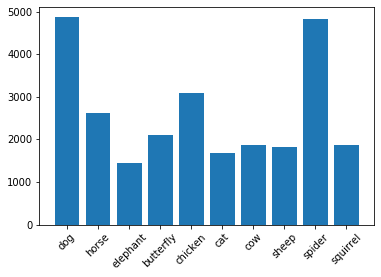

In [0]:
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

def barChart(data):
    """
    Agr:
    - data: type is the dictionary. Keys is the name of class, values is the numbers of elements in class.
    Return:
    - Bar chart of data
    """
    x_pos = [i for i, _ in enumerate(data.keys())]
    plt.bar(x_pos, data.values())
    plt.xticks(x_pos, data.keys(), rotation = 45)
    plt.show()
    
base_dir = '/content/drive/My Drive/Data/animal-10'
raw_data = os.path.join(base_dir, 'raw-img')
list_animal = os.listdir(raw_data)

num_of_each_animal = {}
# translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "ragno": "spider"}
for x in list_animal:
    temp1 = os.path.join(raw_data, x)
    temp2 = os.path.join(raw_data, x)
    os.rename(temp1, temp2)
    num = os.listdir(temp2)
    num_of_each_animal[x] = len(num)
barChart(num_of_each_animal)

Train-Val-Test = 70-10-20

Tạo 3 folder train, val và test.

In [0]:
import os
import shutil

def createDir(path, list_dir):
    """
    Agr:
    - path: là đường dẫn lưu các sub directory. This is a string.
    - list_dir: là danh sách các thư mục sẽ được tạo. This is a list.
    Return:
    - path of each directory in dict
    """
    path_of_dir = {}
    for x in list_dir:
        new_dir = os.path.join(path, x)
        if not os.path.exists(new_dir):
            os.mkdir(new_dir)
        path_of_dir[x] = new_dir
    return path_of_dir
def processRawData(raw_path, ratio, des_path):
    """
    Agr:
    - raw_path: this is the path of raw data.(string)
    - ratio: this is the ratio of train-val-test data.(list)
    - des_path: this is the path of save data is processed.(string)
    Return:
    - data is processed.
    """
    #Create data diretory
    data_dir = createDir(des_path, ['data'])['data']
    part_data = ['train', 'val', 'test']
    data_class = createDir(data_dir, part_data)
    #Create class directory
    raw_class = os.listdir(raw_path)
    path_of_class = {}
    for x in part_data:
        tem = createDir(data_class[x], raw_class)
        path_of_class[x] = tem
    #Div data
    for x in raw_class:
        raw_data_dir = os.path.join(raw_path, x)
        raw_data = os.listdir(raw_data_dir)

        train = int(len(raw_data)*ratio[0])
        val = int(len(raw_data)*(ratio[0] + ratio[1]))
        
        for y in raw_data[:train]:
            tem = os.path.join(raw_data_dir, y)
            shutil.copy(tem, path_of_class['train'][x])
        for y in raw_data[train:val]:
            tem = os.path.join(raw_data_dir, y)
            shutil.copy(tem, path_of_class['val'][x])
        for y in raw_data[val:]:
            tem = os.path.join(raw_data_dir, y)
            shutil.copy(tem, path_of_class['test'][x])
base_dir = '/content/drive/My Drive/Data/animal-10'
raw_dir = os.path.join(base_dir, 'raw-img')
processRawData(raw_dir, [0.7, 0.1, 0.2], base_dir)

In [0]:
def check(raw_dir, data_dir):
    raw_class = os.listdir(raw_dir)
    test = os.path.join(data_dir, 'test')
    print(test)
    for x in raw_class:        
        amount_raw = len(os.listdir(os.path.join(raw_dir, x)))        
        amount_data = 0
        for y in ['train', 'val', 'test']:
            tem = os.path.join(data_dir, y)
            tem = os.path.join(tem, x)
            amount_data += len(os.listdir(tem))
        print(x, ":", amount_raw == amount_data, amount_data, amount_raw)
        print(x, "test:", len(os.listdir(os.path.join(test, x))))
base_dir = '/content/drive/My Drive/Data/animal-10'
raw_dir = os.path.join(base_dir, 'raw-img')
data_dir = os.path.join(base_dir, 'data')
check(raw_dir, data_dir)

/content/drive/My Drive/Data/animal-10/data/test
dog : True 4863 4863
dog test: 973
horse : True 2623 2623
horse test: 525
elephant : True 1446 1446
elephant test: 290
butterfly : True 2112 2112
butterfly test: 423


KeyboardInterrupt: ignored

# ***3. Preprocessing image***

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Tạo một ImageDataGenerator. Dùng để đọc một folder.

In [0]:
base_dir = '/content/drive/My Drive/Data/animal-10/data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
evaluation_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen  = ImageDataGenerator(rescale = 1./255)
evl_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'categorical')
validation_generation = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')
evaluation_generation = evl_datagen.flow_from_directory(
    evaluation_dir,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical',
    shuffle = False)

Found 18322 images belonging to 10 classes.
Found 2615 images belonging to 10 classes.
Found 5242 images belonging to 10 classes.


# ***4. Model:***

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model 

from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.applications.vgg16 import VGG16

In [0]:
# Create VGG16 model
input_tensor = layers.Input(shape=(224, 224, 3))
model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

In [0]:
# Freeze first 15 layer
for layer in model.layers[:15]:
    layer.trainable = False
last_layer = model.get_layer('block5_pool')
last_output = last_layer.output
print(last_output)

Tensor("block5_pool/Identity:0", shape=(None, 7, 7, 512), dtype=float32)


In [0]:
# Build Fully-connected
top_model = layers.Flatten()(last_output)
top_model = layers.Dropout(0.5)(top_model)
top_model = layers.Dense(1024, activation = 'relu')(top_model)
top_model = layers.Dense(10, activation = 'softmax')(top_model)

model = Model(model.input, top_model)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
model.compile(loss = 'categorical_crossentropy',
                optimizer=Adam(lr = 0.0001),
                metrics = ['acc'])

In [0]:
step_epoch = train_generator.n//train_generator.batch_size + 1
step_vali = validation_generation.n//validation_generation.batch_size + 1
print(step_epoch)
print(step_vali)

144
41


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = step_epoch,
    epochs = 50,
    validation_data = validation_generation,
    validation_steps = step_vali,
    verbose = 1)
model.save('./model.h5')
import pickle
with open('./trainHistory', 'wb') as f:
    pickle.dump(history.history, f)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 144 steps, validate for 41 steps
Epoch 1/50
144/144 [==============================] - 281s 2s/step - loss: 1.0832 - acc: 0.6369 - val_loss: 0.4972 - val_acc: 0.8371
Epoch 2/50
144/144 [==============================] - 264s 2s/step - loss: 0.5325 - acc: 0.8225 - val_loss: 0.4428 - val_acc: 0.8566
Epoch 3/50
144/144 [==============================] - 250s 2s/step - loss: 0.4205 - acc: 0.8572 - val_loss: 0.3102 - val_acc: 0.9006
Epoch 4/50
144/144 [==============================] - 256s 2s/step - loss: 0.3448 - acc: 0.8842 - val_loss: 0.2930 - val_acc: 0.9078
Epoch 5/50
144/144 [==============================] - 258s 2s/step - loss: 0.3103 - acc: 0.8987 - val_loss: 0.2799 - val_acc: 0.9143
Epoch 6/50
144/144 [==============================] - 242s 2s/step - loss: 0.2691 - acc: 0.9119 - val_loss: 0.2616 - val_acc: 0.9170
Epoch 7/50
144/144 [=============

Lưu Model và lịch sử huấn luyện:

# ***5. Đánh giá***

In [0]:
%cd /content/drive/My\ Drive/Data/animal-10

/content/drive/My Drive/Data/animal-10


Text(0.5, 1.0, 'Training and validation loss')

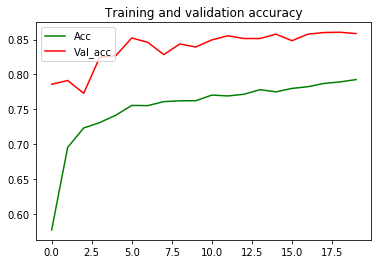

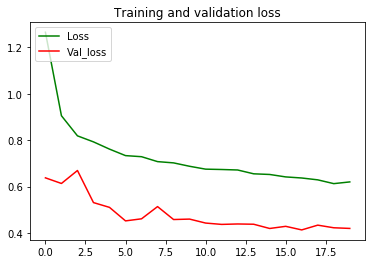

In [0]:
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
import pickle
with open('./trainHistory', 'rb') as f:
    history = pickle.load(f)
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history['acc']
val_acc = history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history['loss']
val_loss = history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(history['acc'],'green',label='Acc')
plt.plot(history['val_acc'],'red',label='Val_acc')
plt.legend(loc='upper left')
# plt.plot(epochs, acc)
# plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(history['loss'],'green',label='Loss')
plt.plot(history['val_loss'],'red',label='Val_loss')
plt.legend(loc='upper left')
# plt.plot(epochs, loss)
# plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline
def draw_heatmap_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    classes.sort()

    tick_marks = np.arange(cm.shape[0])
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)

    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    thresol = cm.max()*0.7 + cm.min()*0.3
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresol else "black")
    plt.colorbar()

    plt.title("Confusion matrix")
    plt.ylabel("True lable", rotation = 90)
    plt.xlabel("Predict lable")
"""
evaluation_generation.reset()
Y_pred = model.predict_generator(evaluation_generation)
classes = evaluation_generation.classes[evaluation_generation.index_array]
y_pred = np.argmax(Y_pred, axis=-1)
"""

'\nevaluation_generation.reset()\nY_pred = model.predict_generator(evaluation_generation)\nclasses = evaluation_generation.classes[evaluation_generation.index_array]\ny_pred = np.argmax(Y_pred, axis=-1)\n'

In [0]:
evaluation_generation.reset()
Y_true = evaluation_generation.labels

Y_pred = model.predict_generator(evaluation_generation, steps = 82)
y_pred = np.argmax(Y_pred, axis=-1)

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Classification Report
              precision    recall  f1-score   support

   butterfly       0.93      0.92      0.92       423
         cat       0.88      0.75      0.81       334
     chicken       0.83      0.93      0.88       620
         cow       0.75      0.84      0.79       374
         dog       0.83      0.86      0.85       973
    elephant       0.86      0.83      0.85       290
       horse       0.85      0.82      0.83       525
       sheep       0.81      0.65      0.72       365
      spider       0.90      0.96      0.93       965
    squirrel       0.86      0.73      0.79       373

    accuracy                           0.85      5242
   macro avg       0.85      0.83      0.84      5242
weighted avg       0.85      0.85      0.85      5242



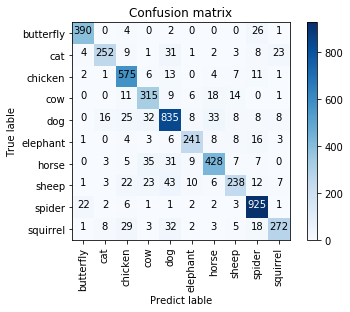

In [0]:
base_dir = '/content/drive/My Drive/Data/animal-10/data'
evaluation_dir = os.path.join(base_dir, 'test')
target_names = os.listdir(evaluation_dir)
draw_heatmap_confusion_matrix(Y_true, y_pred, target_names)
print('Classification Report')
print(classification_report(evaluation_generation.classes, y_pred, target_names=target_names))

In [0]:
# score = model.evaluate_generator(evaluation_generation, steps = 82)
from tensorflow.keras.models import load_model
score = load_model('/content/drive/My Drive/Data/animal-10/model.h5')
print("loss:", score[0])
print("acc:", score[1])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


TypeError: ignored

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)